In [1]:
from typing import List, TypedDict
from langgraph.graph import StateGraph,START,END

In [2]:
class AgentState(TypedDict):
    num1: int
    num2: int
    operation: str
    finalNumber: int

In [4]:
def adder(state: AgentState) -> AgentState:
    state["finalNumber"] = state["num1"] + state["num2"]
    return state    
def subtractor(state: AgentState) -> AgentState:
    state["finalNumber"] = state["num1"] - state["num2"]
    return state

def decide_next_node(state: AgentState) -> str:
    if state["operation"] == "+":
        return "adder"
    elif state["operation"] == "-":
        return "subtractor"
    else:
        raise ValueError("Invalid operation")

In [6]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state)

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "adder": "add_node",
        "subtractor": "subtract_node"
    }
)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
app = graph.compile()


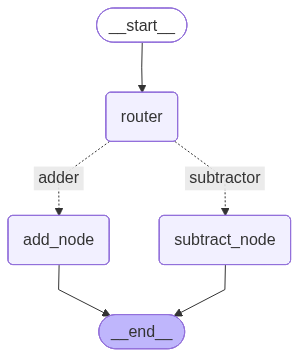

In [7]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [9]:

app.invoke({"num1": 10, "num2": 5, "operation": "-"})

{'num1': 10, 'num2': 5, 'operation': '-', 'finalNumber': 5}

In [10]:
app.invoke({"num1": 10, "num2": 5, "operation": "+"})

{'num1': 10, 'num2': 5, 'operation': '+', 'finalNumber': 15}